<a href="https://colab.research.google.com/github/EddiRafael/Clase_desarrollo_proyectos/blob/main/Last_Mile_Entregable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special 
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
#Carga desde un archivo .xlsx sin indice
lm= pd.read_excel('lastmile_delivery_operations_mit_lift_lab.xlsx')

In [ ]:
lm.info()

In [ ]:
vn=lm.isnull().sum()
vn

In [ ]:
vn=lm.isnull().sum().sum()
vn

1233

In [ ]:
lm1=lm.fillna(method="ffill")
lm1

In [ ]:
vn=lm1.isnull().sum()
vn

In [ ]:
lm2=lm1.copy()

In [ ]:
lm2["serving_customer"]=lm2["serving_customer"].fillna(round(lm2["serving_customer"].mean(),1))

In [ ]:
lm2["maximum_number_of_vehicles_in_the_traffic_jam"]=lm2["maximum_number_of_vehicles_in_the_traffic_jam"].fillna(round(lm2["maximum_number_of_vehicles_in_the_traffic_jam"].mean(),1))

In [ ]:
lm2["describe_the_accident"]=lm2["describe_the_accident"].fillna(round(lm2["describe_the_accident"].mean(),1))

In [ ]:
vn=lm2.isnull().sum()
vn

In [ ]:
lm2["describe_the_accident"]=lm2["describe_the_accident"].fillna('nulo')

In [ ]:
vn=lm2.isnull().sum()
vn

In [ ]:
lm2["company_if_visible"]=lm2["company_if_visible"].fillna(0)

In [ ]:
vn=lm2.isnull().sum()
vn

In [199]:
vn=lm2.isnull().sum().sum()
vn

0

OUTLIERS

In [ ]:
f=lm2.iloc[:,[6,7,13,22,23,26,29]]
f

In [ ]:
y=f
LS=y.mean()+3*y.std()
LI=y.mean()-3*y.std()
print("Limite Superior Permitido",LS)
print("Limite Inferior Permitido",LI)

In [ ]:
o=f[(y>LS)|(y<LI)]
o

In [ ]:
dataf=f[(y>=LS)&(y>=LI)]
dataf

In [ ]:
vn=dataf.isnull().sum()
vn

In [ ]:
dataf2=dataf.fillna(method="ffill")
dataf2

In [ ]:
vn=dataf2.isnull().sum()
vn

In [ ]:
dataf2["_latitude"]=dataf2["_latitude"].fillna('nulo')

In [ ]:
dataf2["_longitude"]=dataf2["_longitude"].fillna('nulo')

In [ ]:
dataf2["number_of_operators"]=dataf2["number_of_operators"].fillna(round(dataf2["number_of_operators"].mean(),1))

In [ ]:
dataf2["number_of_available_trolleys"]=dataf2["number_of_available_trolleys"].fillna(round(dataf2["number_of_available_trolleys"].mean(),1))

In [ ]:
dataf2["maximum_number_of_vehicles_in_the_traffic_jam"]=dataf2["maximum_number_of_vehicles_in_the_traffic_jam"].fillna(round(dataf2["maximum_number_of_vehicles_in_the_traffic_jam"].mean(),1))

In [ ]:
vn=dataf2.isnull().sum()
vn

In [ ]:
fig=plt.figure(figsize=(15,8))
dataf2.plot(kind='box',vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show()

In [ ]:
f2=lm2.iloc[:,[0,1,2,3,4,5,8,9,10,11,12,14,15,16,17,18,19,20,21,24,25,27,28]]

In [ ]:
Datos_lim=pd.concat([f,f2],axis=1)
Datos_lim

In [202]:
vn=Datos_lim.isnull().sum()
vn

_latitude                                        0
_longitude                                       0
number_of_operators                              0
number_of_available_trolleys                     0
serving_customer                                 0
describe_the_accident                            0
maximum_number_of_vehicles_in_the_traffic_jam    0
_record_id                                       0
_title                                           0
_server_updated_at                               0
_created_by                                      0
_updated_by                                      0
_geometry                                        0
arrival_of_the_freight_vehicle                   0
plates                                           0
company_if_visible                               0
visit_purpose                                    0
type_of_vehicle                                  0
refrigerated_truck                               0
type_of_cargo                  

In [201]:
vn=Datos_lim.isnull().sum().sum()
vn

0

In [ ]:
Datos_lim.to_csv("Datos_limpios.csv")

In [ ]:
from google.colab import files
files.download("Datos_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

EXTRACCION DE CARACTERISTICAS 

In [ ]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

In [122]:
# Importamos librerias pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
from google.colab import files 
files.upload()

In [116]:
# Carga desde un archivo csv sin índice
LL=pd.read_csv('Datos_limpios.csv')

In [151]:
LL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     390 non-null    int64  
 1   _latitude                                      390 non-null    float64
 2   _longitude                                     390 non-null    float64
 3   number_of_operators                            390 non-null    int64  
 4   number_of_available_trolleys                   390 non-null    int64  
 5   serving_customer                               390 non-null    float64
 6   describe_the_accident                          390 non-null    float64
 7   maximum_number_of_vehicles_in_the_traffic_jam  390 non-null    float64
 8   _record_id                                     390 non-null    object 
 9   _title                                         390 non

In [ ]:
LL.head()

In [ ]:
freq_tbl(LL)

In [ ]:
table1= freq_tbl(LL['vehicles_unloading_door'])
table1

In [ ]:
Filtro1= table1[table1['frequency']>1]
Filtro1

In [ ]:
Filtro1_index= Filtro.set_index('vehicles_unloading_door')
Filtro1_index

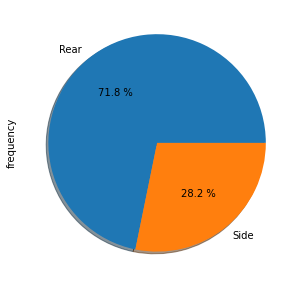

In [175]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro1_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
table2= freq_tbl(LL['while_parked_was_the_engine_running'])
table2

In [ ]:
Filtro2= table2[table2['frequency']>1]
Filtro2

In [ ]:
Filtro2_index= Filtro2.set_index('while_parked_was_the_engine_running')
Filtro2_index

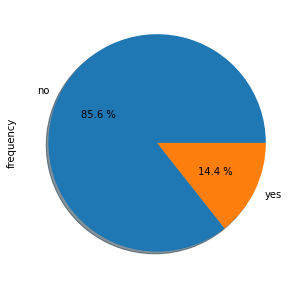

In [180]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro2_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
table3= freq_tbl(LL['garage_blocking'])
table3

In [ ]:
Filtro3= table3[table3['frequency']>1]
Filtro3

In [ ]:
Filtro3_index= Filtro3.set_index('garage_blocking')
Filtro3_index

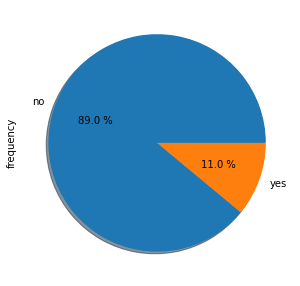

In [186]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro3_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
table4= freq_tbl(LL['traffic_congestion'])
table4

In [ ]:
Filtro4= table4[table3['frequency']>1]
Filtro4

In [ ]:
Filtro4_index= Filtro4.set_index('traffic_congestion')
Filtro4_index

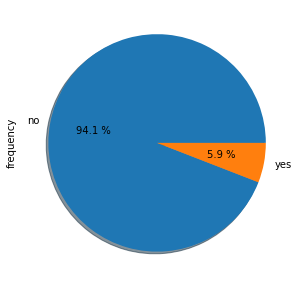

In [196]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro4_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
table5= freq_tbl(LL['accident'])
table5

In [ ]:
Filtro5= table5[table3['frequency']>1]
Filtro5

In [ ]:
Filtro5_index= Filtro5.set_index('accident')
Filtro5_index

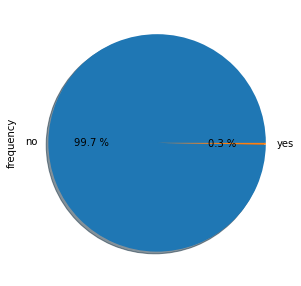

In [195]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro5_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")